In [1]:
import matplotlib.pyplot as plt
import os

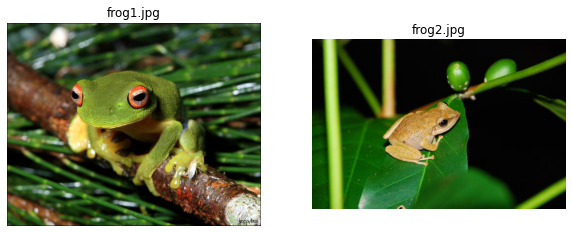

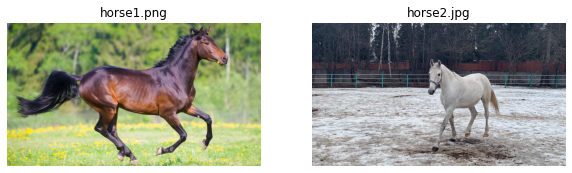

In [2]:
from part1.utils import show_images
# show frog and horse images images
frogs_dir_path = './data/frogs'
horse_dir_path = './data/horses'
show_images(frogs_dir_path)
show_images(horse_dir_path)

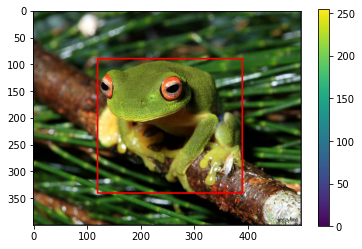

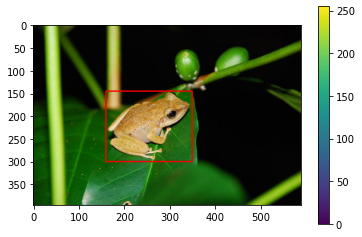

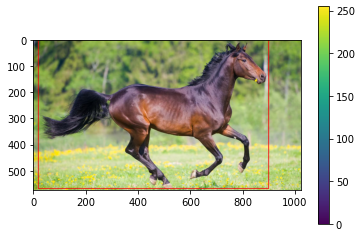

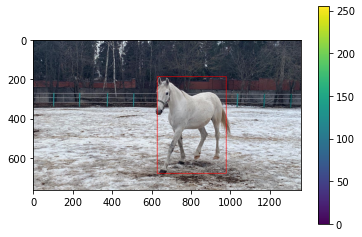

In [3]:
#1.1 Display images with bbox
from part1.utils import show_im_with_bbox
im_path_frog1 = './data/frogs/frog1.jpg';start_point_frog1 = (120, 90); end_point_frog1 = (390, 340)
im_path_frog2 = './data/frogs/frog2.jpg';start_point_frog2 = (160, 145); end_point_frog2 = (350, 300)
im_path_horse1 = './data/horses/horse1.png';start_point_horse1 = (20, 0); end_point_horse1 = (900, 570)
im_path_horse2 = './data/horses/horse2.jpg';start_point_horse2 = (630, 190); end_point_horse2 = (980, 680)
frog1_rec = show_im_with_bbox(im_path_frog1, start_point_frog1, end_point_frog1)
frog2_rec = show_im_with_bbox(im_path_frog2, start_point_frog2, end_point_frog2)
horse1_rec = show_im_with_bbox(im_path_horse1, start_point_horse1, end_point_horse1)
horse2_rec = show_im_with_bbox(im_path_horse2, start_point_horse2, end_point_horse2)

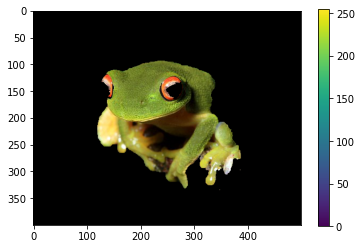

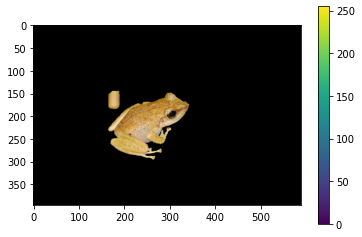

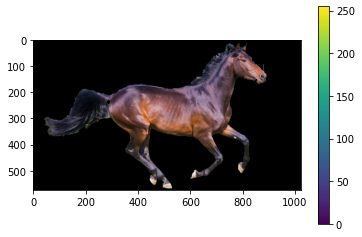

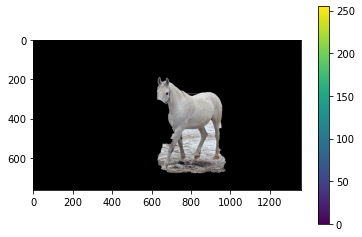

In [4]:
# #1.2 Segment images with rectangle bbox only - classic
from part1.segment import grab_cut_bbox
grab_cut_bbox(im_path_frog1, start_point_frog1, end_point_frog1)
grab_cut_bbox(im_path_frog2, start_point_frog2, end_point_frog2)
grab_cut_bbox(im_path_horse1, start_point_horse1, end_point_horse1)
grab_cut_bbox(im_path_horse2, start_point_horse2, end_point_horse2) 

Using cache found in C:\Users\micha/.cache\torch\hub\pytorch_vision_v0.4.0


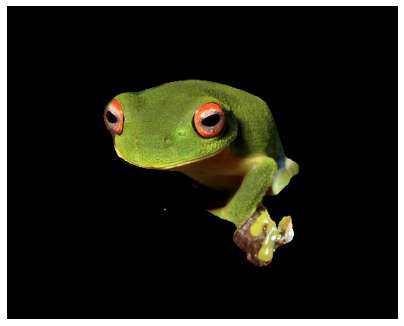

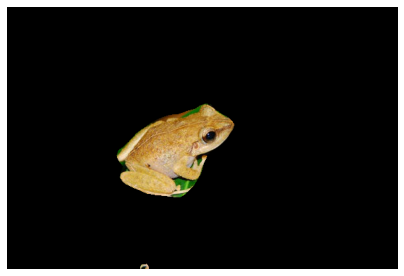

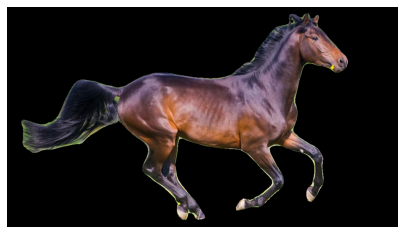

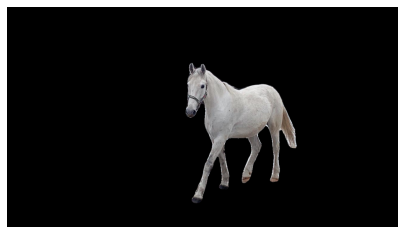

In [5]:
#1.2 Segment images with annotation - DNN
import torch
import torchvision.transforms as transforms
from PIL import Image
from part1.segment import segment_deeplabv3

def segment_and_plot(model, im_path):
    _, masked_im = segment_deeplabv3(model, im_path); 
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.imshow(masked_im)
    ax.set_axis_off()

    
model = torch.hub.load('pytorch/vision:v0.4.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()
file_names = [im_path_frog1, im_path_frog2, im_path_horse1, im_path_horse2]
for f_name in file_names:
    segment_and_plot(model, f_name)

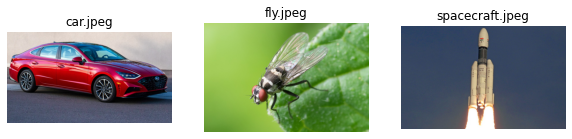

In [6]:
# 1.3
three_im_dir_path = './my_data/part1.3'
show_images(three_im_dir_path)

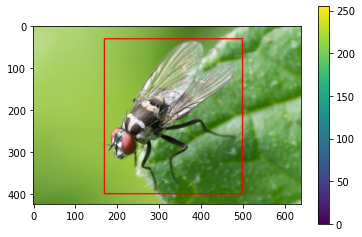

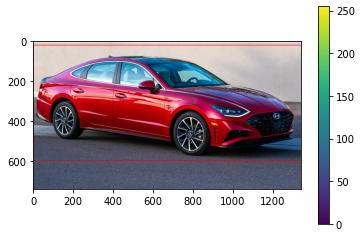

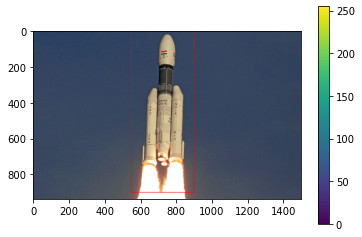

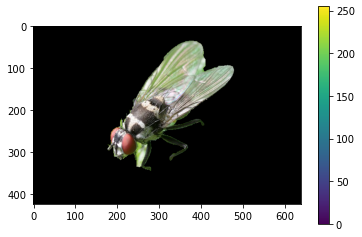

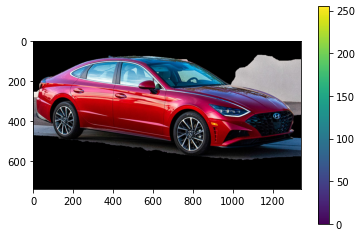

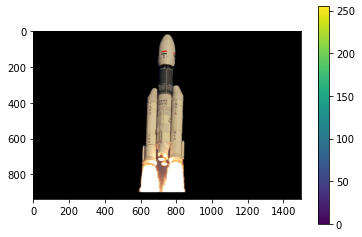

In [7]:
#1.4 - classic method
from part1.segment import grab_cut_bbox
im_path_fly = './my_data/part1.3/fly.jpeg';start_point_fly = (170, 30); end_point_fly = (500, 400)
im_path_car = './my_data/part1.3/car.jpeg';start_point_car = (0, 25); end_point_car = (1400, 600)
im_path_spacecraft = './my_data/part1.3/spacecraft.jpeg';start_point_spacecraft = (550, 0); end_point_spacecraft = (900, 900)
# show bbox
show_im_with_bbox(im_path_fly, start_point_fly, end_point_fly)
show_im_with_bbox(im_path_car, start_point_car, end_point_car)
show_im_with_bbox(im_path_spacecraft, start_point_spacecraft, end_point_spacecraft)
# segment
grab_cut_bbox(im_path_fly, start_point_fly, end_point_fly)
grab_cut_bbox(im_path_car, start_point_car, end_point_car)
grab_cut_bbox(im_path_spacecraft, start_point_spacecraft, end_point_spacecraft)

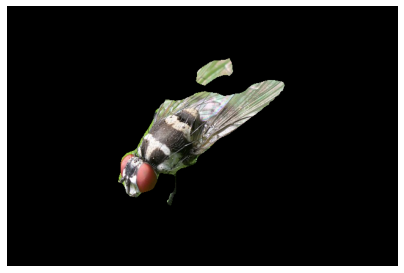

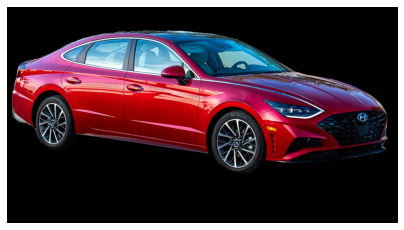

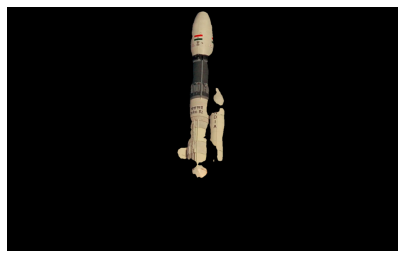

In [8]:
# 1.4 - DNN method
segment_and_plot(model, im_path_fly)
segment_and_plot(model, im_path_car)
segment_and_plot(model, im_path_spacecraft)

In [9]:
# 1.6 - load pre-trained classifier
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

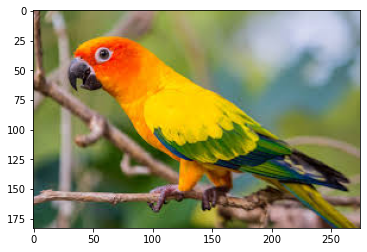

In [10]:
# 1.7 - show cow image
from part1.utils import load_image
bird_im_path = './my_data/part1.7/bird_1.jpg'
bird_im = load_image(bird_im_path)
plt.figure()
plt.imshow(bird_im)

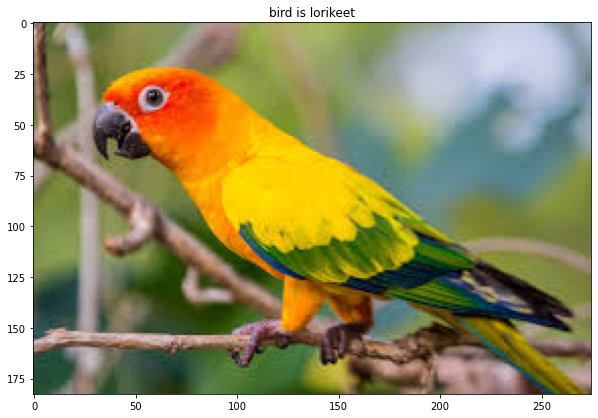

In [11]:
# 1.7
import json
from part1.pre_process_vgg import prepare_image, predict
from PIL import Image

with open('./my_data/imagenet_classes_json/imagenet_class_index.json', 'r') as f:
    labels = json.load(f)

labels = {int(key): value[1] for key, value in labels.items()}
size = 244

# plot given birds
fig = plt.figure(figsize=(10, 10))
norm_im = prepare_image(bird_im, device='cpu')
pred = predict(norm_im, vgg16, labels)
plt.title(f'bird is {pred}')
plt.imshow(bird_im)

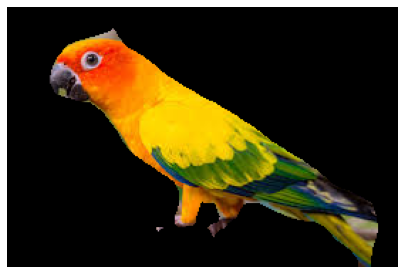

In [12]:
#1.8
import numpy as np

mask, masked_im = segment_deeplabv3(model, bird_im_path); 
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.imshow(masked_im)
ax.set_axis_off()

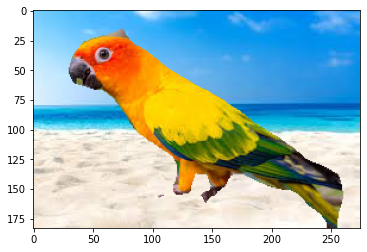

In [13]:
#1.9
from PIL import Image, ImageDraw, ImageFilter
res = np.array(masked_im)
mask_for_target = np.array(abs(1 - mask))*255
resize_shape = (mask_for_target.shape[1], mask_for_target.shape[0])
mask_for_target = transforms.ToPILImage()(mask_for_target).convert('L')


trget = Image.open('my_data/part1.9/beach.jpeg').resize(resize_shape)
desert_bird = Image.composite(trget, bird_im, mask_for_target)
plt.imshow(desert_bird)
save_path = '../output/desert_bird.jpeg'
desert_bird.save(save_path)

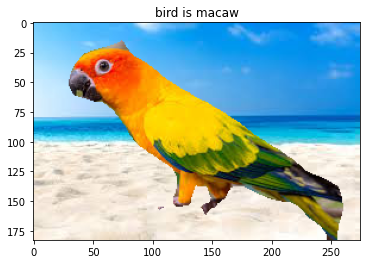

In [14]:
#1.10
norm_im = prepare_image(desert_bird, device='cpu')
pred = predict(norm_im, vgg16, labels)
plt.title(f'bird is {pred}')
plt.imshow(desert_bird)